<h1>hw 1 - Boston 집값 데이터 셋 추가 분석</h1>

In [52]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats 

<h5>(Scikit-Learn 1.2버전부터 Boston 데이터 셋 및 load_boston 함수가 삭제되었기에 해당 데이터 셋의 csv 파일을 직접 사용)</h5>

In [53]:
boston = pd.read_csv("C:/ai_dataset/BostonHousing.csv")

In [54]:
boston

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48


In [55]:
boston.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat'],
      dtype='object')

In [56]:
boston.shape

(506, 13)

<h5>csv 파일 내에는 target데이터가 내장되어 있지 않기에 직접 추가</h5>

In [57]:
target = [24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
        19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
        20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
        23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
        33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
        21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
        20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
        23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
        15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21.5, 19.6, 15.3, 19.4,
        17. , 15.6, 13.1, 41.3, 24.3, 23.3, 27. , 50. , 50. , 50. , 22.7,
        25. , 50. , 23.8, 23.8, 22.3, 17.4, 19.1, 23.1, 23.6, 22.6, 29.4,
        23.2, 24.6, 29.9, 37.2, 39.8, 36.2, 37.9, 32.5, 26.4, 29.6, 50. ,
        32. , 29.8, 34.9, 37. , 30.5, 36.4, 31.1, 29.1, 50. , 33.3, 30.3,
        34.6, 34.9, 32.9, 24.1, 42.3, 48.5, 50. , 22.6, 24.4, 22.5, 24.4,
        20. , 21.7, 19.3, 22.4, 28.1, 23.7, 25. , 23.3, 28.7, 21.5, 23. ,
        26.7, 21.7, 27.5, 30.1, 44.8, 50. , 37.6, 31.6, 46.7, 31.5, 24.3,
        31.7, 41.7, 48.3, 29. , 24. , 25.1, 31.5, 23.7, 23.3, 22. , 20.1,
        22.2, 23.7, 17.6, 18.5, 24.3, 20.5, 24.5, 26.2, 24.4, 24.8, 29.6,
        42.8, 21.9, 20.9, 44. , 50. , 36. , 30.1, 33.8, 43.1, 48.8, 31. ,
        36.5, 22.8, 30.7, 50. , 43.5, 20.7, 21.1, 25.2, 24.4, 35.2, 32.4,
        32. , 33.2, 33.1, 29.1, 35.1, 45.4, 35.4, 46. , 50. , 32.2, 22. ,
        20.1, 23.2, 22.3, 24.8, 28.5, 37.3, 27.9, 23.9, 21.7, 28.6, 27.1,
        20.3, 22.5, 29. , 24.8, 22. , 26.4, 33.1, 36.1, 28.4, 33.4, 28.2,
        22.8, 20.3, 16.1, 22.1, 19.4, 21.6, 23.8, 16.2, 17.8, 19.8, 23.1,
        21. , 23.8, 23.1, 20.4, 18.5, 25. , 24.6, 23. , 22.2, 19.3, 22.6,
        19.8, 17.1, 19.4, 22.2, 20.7, 21.1, 19.5, 18.5, 20.6, 19. , 18.7,
        32.7, 16.5, 23.9, 31.2, 17.5, 17.2, 23.1, 24.5, 26.6, 22.9, 24.1,
        18.6, 30.1, 18.2, 20.6, 17.8, 21.7, 22.7, 22.6, 25. , 19.9, 20.8,
        16.8, 21.9, 27.5, 21.9, 23.1, 50. , 50. , 50. , 50. , 50. , 13.8,
        13.8, 15. , 13.9, 13.3, 13.1, 10.2, 10.4, 10.9, 11.3, 12.3,  8.8,
         7.2, 10.5,  7.4, 10.2, 11.5, 15.1, 23.2,  9.7, 13.8, 12.7, 13.1,
        12.5,  8.5,  5. ,  6.3,  5.6,  7.2, 12.1,  8.3,  8.5,  5. , 11.9,
        27.9, 17.2, 27.5, 15. , 17.2, 17.9, 16.3,  7. ,  7.2,  7.5, 10.4,
         8.8,  8.4, 16.7, 14.2, 20.8, 13.4, 11.7,  8.3, 10.2, 10.9, 11. ,
         9.5, 14.5, 14.1, 16.1, 14.3, 11.7, 13.4,  9.6,  8.7,  8.4, 12.8,
        10.5, 17.1, 18.4, 15.4, 10.8, 11.8, 14.9, 12.6, 14.1, 13. , 13.4,
        15.2, 16.1, 17.8, 14.9, 14.1, 12.7, 13.5, 14.9, 20. , 16.4, 17.7,
        19.5, 20.2, 21.4, 19.9, 19. , 19.1, 19.1, 20.1, 19.9, 19.6, 23.2,
        29.8, 13.8, 13.3, 16.7, 12. , 14.6, 21.4, 23. , 23.7, 25. , 21.8,
        20.6, 21.2, 19.1, 20.6, 15.2,  7. ,  8.1, 13.6, 20.1, 21.8, 24.5,
        23.1, 19.7, 18.3, 21.2, 17.5, 16.8, 22.4, 20.6, 23.9, 22. , 11.9]

In [58]:
boston['price'] = target

In [59]:
boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,price
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


<h2>0. EDA</h2>

<h3>결측치 제거</h3>

In [60]:
boston.isna().sum()

## 결측치 없음

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
price      0
dtype: int64

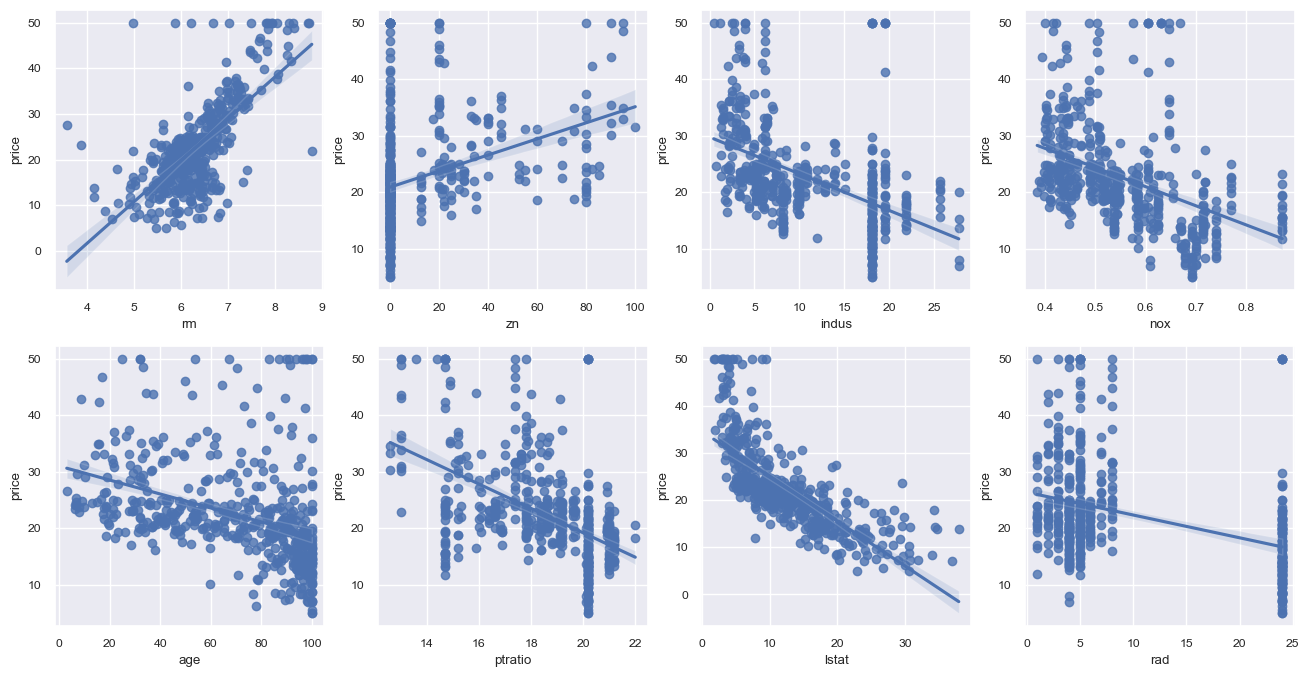

In [61]:
fig, axs = plt.subplots(figsize=(16,8), ncols=4, nrows=2)

lm_features = ['rm','zn','indus','nox','age','ptratio','lstat', 'rad']

for i, feature in enumerate(lm_features):
    row = int(i/4) 
    col = i%4

    sns.regplot(x=feature, y='price', data=boston, ax=axs[row][col])

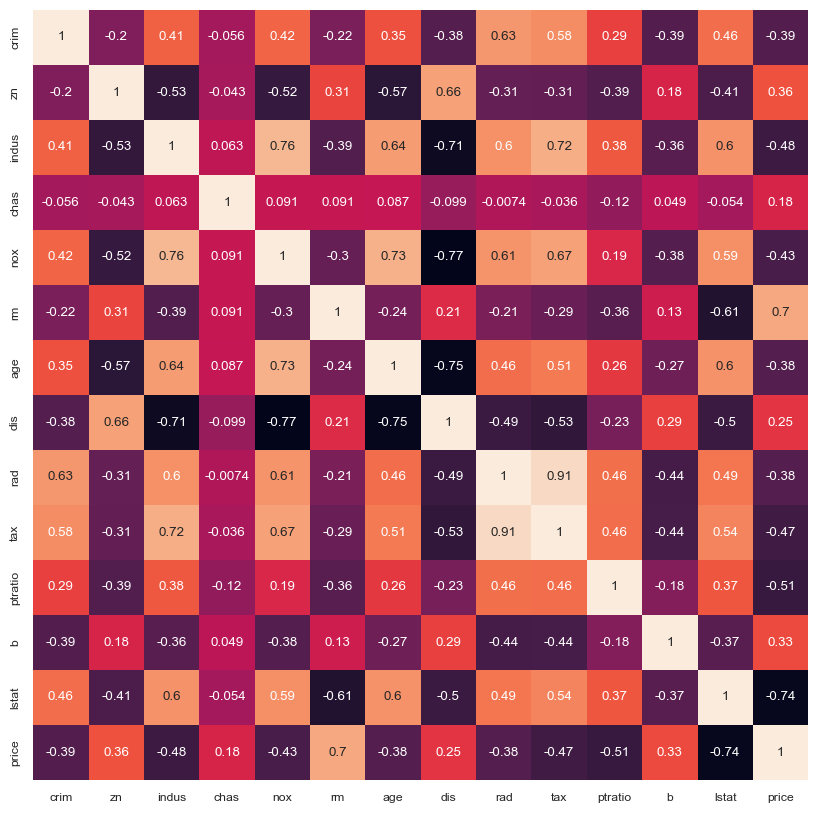

In [62]:
boston_corr = boston.corr()

plt.figure(figsize=(10,10))
sns.set(font_scale=0.8)
sns.heatmap(boston_corr, annot=True, cbar=False)
plt.show()

<h3>price와 기타 Feature의 관계 확인</h3>

<h5>'rm', 'zn', 'indus', 'lstat', 'crim', 'dis', 'tax' 기준</h5>

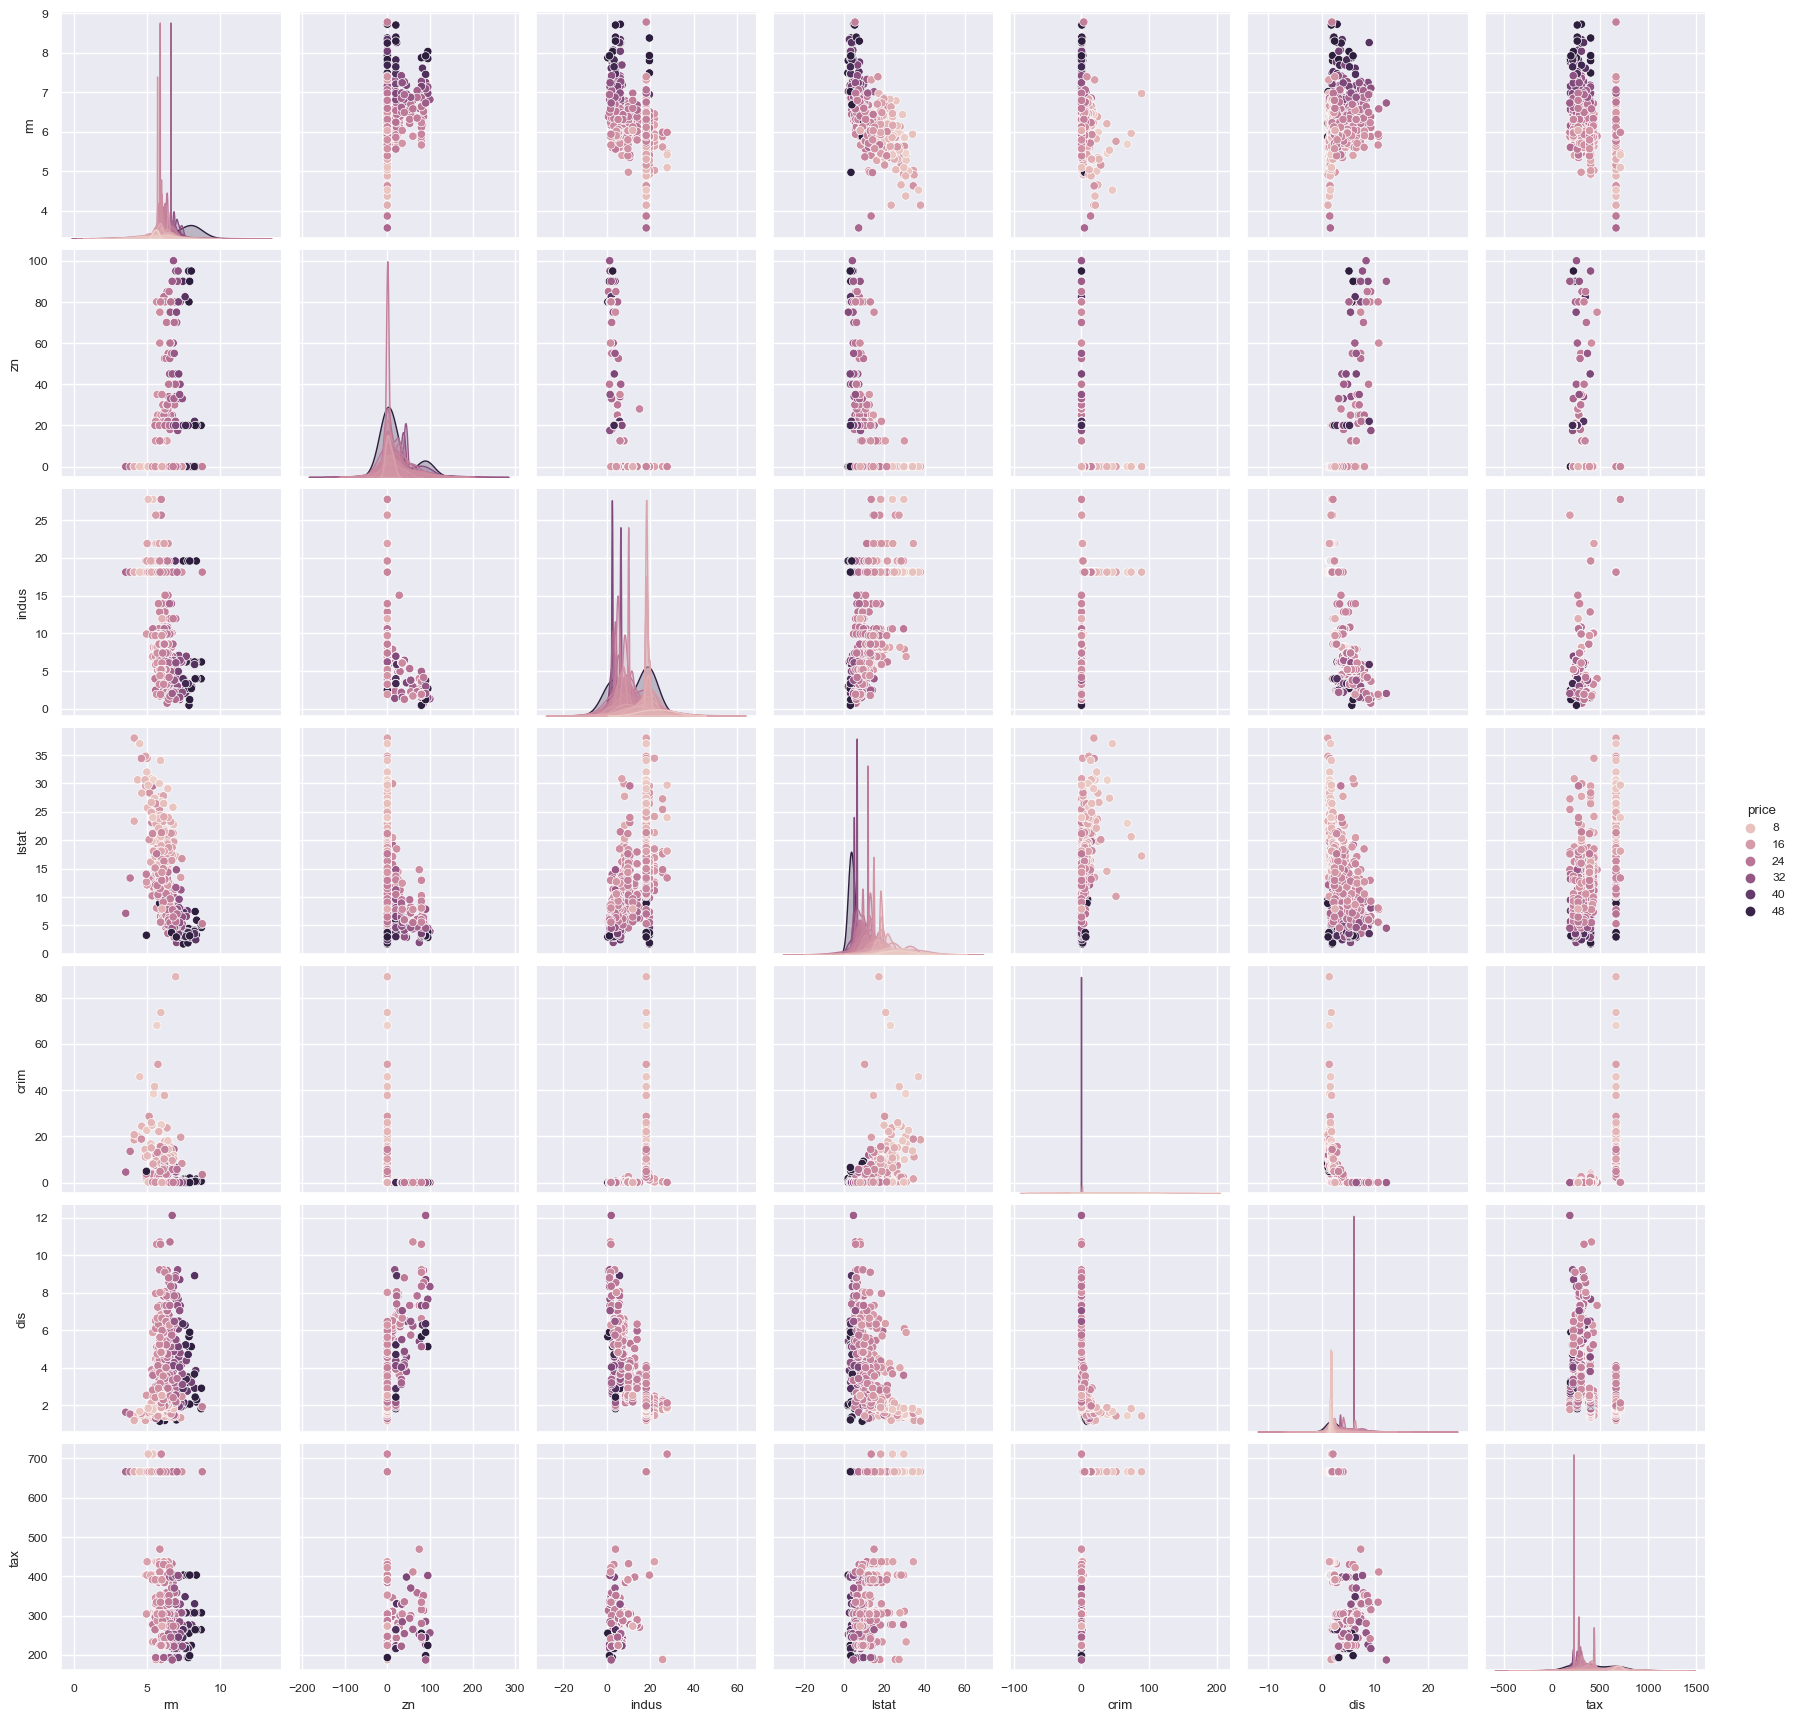

In [64]:
target_feature = ['rm', 'zn', 'indus', 'lstat', 'crim', 'dis', 'tax']

sns.pairplot(boston, vars=target_feature, hue ='price')

plt.show()

<h2>1. LSTAT, RM, PTRTIO, INDUS만 추출</h2>

In [65]:
boston.drop(columns=['zn', 'nox', 'age', 'rad', 'crim', 'chas', 'dis', 'tax', 'b', 'price'], inplace=True)

In [66]:
boston.head()

,indus,rm,ptratio,lstat
0,2.31,6.575,15.3,4.98
1,7.07,6.421,17.8,9.14
2,7.07,7.185,17.8,4.03
3,2.18,6.998,18.7,2.94
4,2.18,7.147,18.7,5.33


<h2>2. StandScaler()</h2>

In [67]:
from sklearn.preprocessing import StandardScaler

In [68]:
scaler = StandardScaler()

scaled_boston = scaler.fit_transform(boston)
scaled_boston = pd.DataFrame(scaled_boston, columns=boston.columns)

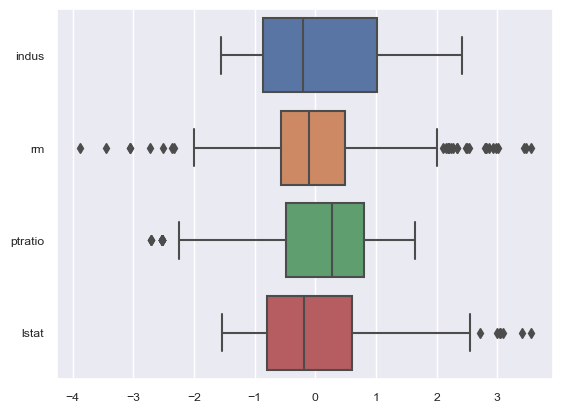

In [69]:
sns.boxplot(data=scaled_boston, orient="h")

plt.show()

<h2>3. 예측</h2>

In [70]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [73]:
from sklearn.model_selection import train_test_split

x_data = boston.loc[:, ['indus', 'ptratio', 'rm']]
y_data = boston.loc[:, 'lstat']
X_train, X_test, y_train, y_test=train_test_split(x_data, y_data, test_size=0.2, shuffle=True, random_state=12)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(404, 3) (404,)
(102, 3) (102,)


In [74]:
X_train.head()

,indus,ptratio,rm
266,3.97,13.0,7.014
501,11.93,21.0,6.593
297,13.92,16.0,5.790
388,18.10,20.2,4.880
477,18.10,20.2,5.304


In [75]:
y_train.head()

266    14.79
501     9.67
297    15.84
388    30.62
477    24.91
Name: lstat, dtype: float64

<h3>Linear Regression</h3>

In [76]:
lr = LinearRegression()

lr.fit(X_train, y_train)

LinearRegression()

In [78]:
print("회귀계수(기울기):", np.round(lr.coef_, 1)) 
print("상수항(절편):", np.round(lr.intercept_, 1)) 

회귀계수(기울기): [ 0.4  0.2 -5. ]
상수항(절편): 35.5


In [79]:
linear_y_preds = lr.predict(X_test)

print(X_train.shape, X_test.shape)

(404, 3) (102, 3)


In [80]:
print("절편 값:", lr.intercept_)

print("회귀계수:", np.round(lr.coef_,1))

절편 값: 35.49649251836547
회귀계수: [ 0.4  0.2 -5. ]


In [88]:
mse = mean_squared_error(y_test, linear_y_preds)
rmse = np.sqrt(mse)
print(f'MSE : {mse:.3f}, RMSE: {rmse:.3f}')
print(f'Variance score : {r2_score(y_test, linear_y_preds):.3f}')

MSE : 24.703, RMSE: 4.970
Variance score : 0.356


<h2>4. 실제 데이터와 예측 데이터를 산점도 표시 (Optional)</h2>

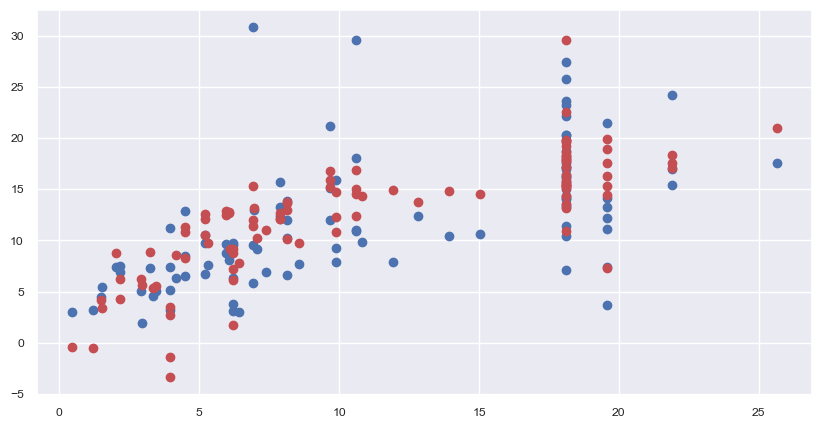

In [85]:
linear_y_test_pred = lr.predict(X_test)

plt.figure(figsize=(10,5))
plt.scatter(X_test['indus'], y_test, label='linear_y_test')
plt.scatter(X_test['indus'], linear_y_test_pred, c='r', label='linear_y_pred')
plt.show()   

<h5>산점도 위에 회귀 그래프 삽입</h5>

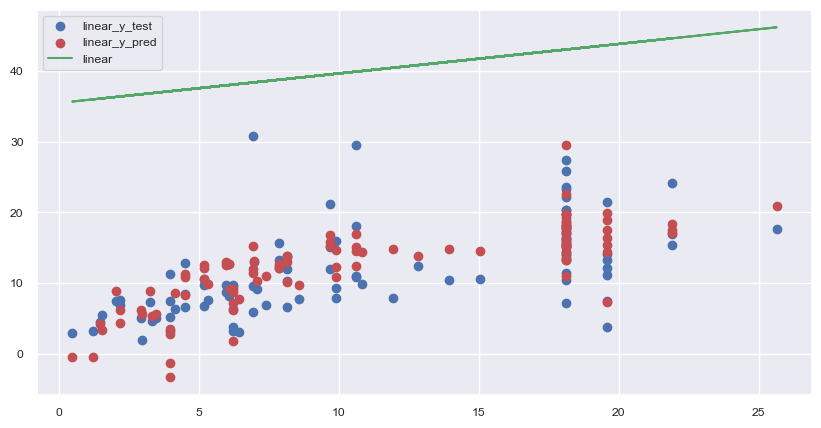

In [86]:
linear_y_test_pred = lr.predict(X_test)

plt.figure(figsize=(10,5))
plt.scatter(X_test['indus'], y_test, label='linear_y_test')
plt.scatter(X_test['indus'], linear_y_test_pred, c='r', label='linear_y_pred')

x = X_test['indus']
y = lr.coef_[0]*x + lr.intercept_
plt.plot(x, y, c='g', label='linear')

plt.legend()
plt.show()  